# Fake News and Hate Speech Detection

### Models Implemented: 
* **Logistic Regression :**  Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.


* **Adaboost Classifier :** An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction.


* **Random Forest :** Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.


* **XGBoost Classifier :** XGBoost is an implementation of Gradient Boosted decision trees. In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. 


* **KNN Classifier :** KNN is a supervised machine learning algorithm that can be used to solve both classification and regression problems. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.


* **Linear SVM :**  Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
df = pd.read_csv(r"C:\Users\user\Downloads\new_combined_dataset.csv")

In [6]:
df

,Unnamed: 0,text,label,label_hate_speech,tweet,Updated_label
0,24196,"Donald Trump’s Jet, a Regular on the Campaign ...",0,1,Bitches always think somebody want them or the...,3
1,53179,Coca-Cola and Pepsi Fund 96 U.S. Health Groups...,1,1,@xcorey21 uh you're trash. &#128536;,1
2,2098,Alex Rodriguez’s Orchestrated Move May Not Be ...,0,2,RT @AP: Lifelong Yankee fan puts aside rooting...,3
3,21253,Who Is Sebastian Gorka? A Trump Adviser Comes ...,0,2,RT @Alleycelestine: &#8220;@ViriDoesItt: Kissi...,3
4,19280,Paul Ryan Calls Donald Trump’s Attack on Judge...,0,1,@xloyalTOme - bitch I'm up for sale every week...,3
...,...,...,...,...,...,...
59995,3141,CPAC Straw Poll Finds Overwhelming Support for...,0,1,A lot of dumb bitches out here....,3
59996,19322,Paul Ryan Calls Donald Trump’s Attack on Judge...,0,1,"A hoe gon be a hoe, that ain't a hunnid.",3
59997,37746,NaN,1,1,"Bitch, you may have a million dollar body, but...",1
59998,35670,Obama’s Brother: I’m Voting TrumpPosted on Oct...,1,2,RT @AnnTelnaes: Halloween candy corn bird http...,1


### Exploring Data

In [7]:
df.shape

(60000, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         60000 non-null  int64 
 1   text               59100 non-null  object
 2   label              60000 non-null  int64 
 3   label_hate_speech  60000 non-null  int64 
 4   tweet              60000 non-null  object
 5   Updated_label      60000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


In [9]:
df.describe()

,Unnamed: 0,label,label_hate_speech,Updated_label
count,60000.000000,60000.000000,60000.000000,60000.000000
mean,29999.500000,0.500000,1.113333,1.943333
std,17320.652413,0.500004,0.462413,1.026388
min,0.000000,0.000000,0.000000,0.000000
25%,14999.750000,0.000000,1.000000,1.000000
50%,29999.500000,0.500000,1.000000,1.500000
75%,44999.250000,1.000000,1.000000,3.000000
max,59999.000000,1.000000,2.000000,3.000000


In [10]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [11]:
df.drop(df.index[:50000])

,text,label,label_hate_speech,tweet,Updated_label
50000,Pope Francis Tells EU Leaders: Populism Is ’Eg...,0,1,Bij vraag wat is d naam van de engels des dood...,3
50001,HUMA IS JUST ‘ONE OF MY STAFFERS’ AFTER CLOSE ...,1,1,A girl who getting it in school and work.... I...,1
50002,Inmates Take Employees Hostage at a Delaware S...,0,1,Bitch ass people are the first to call someone...,3
50003,The Man Who Loathed Pajamas - The New York Tim...,0,1,@zzzentropy @guynamedjordan bitch boys,3
50004,Report: Lena Dunham Rushed to Hospital From Me...,0,2,RT @BasedChasen: Big 10 been trash for years n...,3
...,...,...,...,...,...
59995,CPAC Straw Poll Finds Overwhelming Support for...,0,1,A lot of dumb bitches out here....,3
59996,Paul Ryan Calls Donald Trump’s Attack on Judge...,0,1,"A hoe gon be a hoe, that ain't a hunnid.",3
59997,NaN,1,1,"Bitch, you may have a million dollar body, but...",1
59998,Obama’s Brother: I’m Voting TrumpPosted on Oct...,1,2,RT @AnnTelnaes: Halloween candy corn bird http...,1


In [12]:
df

,text,label,label_hate_speech,tweet,Updated_label
0,"Donald Trump’s Jet, a Regular on the Campaign ...",0,1,Bitches always think somebody want them or the...,3
1,Coca-Cola and Pepsi Fund 96 U.S. Health Groups...,1,1,@xcorey21 uh you're trash. &#128536;,1
2,Alex Rodriguez’s Orchestrated Move May Not Be ...,0,2,RT @AP: Lifelong Yankee fan puts aside rooting...,3
3,Who Is Sebastian Gorka? A Trump Adviser Comes ...,0,2,RT @Alleycelestine: &#8220;@ViriDoesItt: Kissi...,3
4,Paul Ryan Calls Donald Trump’s Attack on Judge...,0,1,@xloyalTOme - bitch I'm up for sale every week...,3
...,...,...,...,...,...
59995,CPAC Straw Poll Finds Overwhelming Support for...,0,1,A lot of dumb bitches out here....,3
59996,Paul Ryan Calls Donald Trump’s Attack on Judge...,0,1,"A hoe gon be a hoe, that ain't a hunnid.",3
59997,NaN,1,1,"Bitch, you may have a million dollar body, but...",1
59998,Obama’s Brother: I’m Voting TrumpPosted on Oct...,1,2,RT @AnnTelnaes: Halloween candy corn bird http...,1


In [13]:
df['text']=df['text'].apply(str)
df['tweet']=df['tweet'].apply(str)

In [14]:
df.drop("label_hate_speech",inplace = True, axis = 1)
df.drop("label",inplace = True, axis = 1)

In [15]:
df

,text,tweet,Updated_label
0,"Donald Trump’s Jet, a Regular on the Campaign ...",Bitches always think somebody want them or the...,3
1,Coca-Cola and Pepsi Fund 96 U.S. Health Groups...,@xcorey21 uh you're trash. &#128536;,1
2,Alex Rodriguez’s Orchestrated Move May Not Be ...,RT @AP: Lifelong Yankee fan puts aside rooting...,3
3,Who Is Sebastian Gorka? A Trump Adviser Comes ...,RT @Alleycelestine: &#8220;@ViriDoesItt: Kissi...,3
4,Paul Ryan Calls Donald Trump’s Attack on Judge...,@xloyalTOme - bitch I'm up for sale every week...,3
...,...,...,...
59995,CPAC Straw Poll Finds Overwhelming Support for...,A lot of dumb bitches out here....,3
59996,Paul Ryan Calls Donald Trump’s Attack on Judge...,"A hoe gon be a hoe, that ain't a hunnid.",3
59997,nan,"Bitch, you may have a million dollar body, but...",1
59998,Obama’s Brother: I’m Voting TrumpPosted on Oct...,RT @AnnTelnaes: Halloween candy corn bird http...,1


In [16]:
df.drop("tweet",inplace = True, axis = 1)

In [17]:
df

,text,Updated_label
0,"Donald Trump’s Jet, a Regular on the Campaign ...",3
1,Coca-Cola and Pepsi Fund 96 U.S. Health Groups...,1
2,Alex Rodriguez’s Orchestrated Move May Not Be ...,3
3,Who Is Sebastian Gorka? A Trump Adviser Comes ...,3
4,Paul Ryan Calls Donald Trump’s Attack on Judge...,3
...,...,...
59995,CPAC Straw Poll Finds Overwhelming Support for...,3
59996,Paul Ryan Calls Donald Trump’s Attack on Judge...,3
59997,nan,1
59998,Obama’s Brother: I’m Voting TrumpPosted on Oct...,1


In [18]:
#plot = df.plot.pie(y='Updated_label', figsize=(5, 5))

ValueError: Image size of 317x900022 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 360x360 with 1 Axes>

In [21]:
!pip install nltk

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [23]:
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
stemmer = PorterStemmer()
sw=set(stopwords.words("english"))

In [26]:
text=df.text

In [27]:
for i in range(0, 5):
    print(text[i])

Donald Trump’s Jet, a Regular on the Campaign Trail, Isn’t Registered to Fly - The New York TimesOver the past several months, Donald J. Trump has crisscrossed the country making dozens of campaign stops in places like Sioux City, Iowa, and Jackson, Miss. often in his sleek Cessna jet. There is just one hitch: The plane’s registration is expired. Records kept with the Federal Aviation Administration show the aircraft’s registration lapsed on Jan. 31. Laura J. Brown, a spokeswoman for the Federal Aviation Administration, confirmed that the plane’s registration was not in good standing and said the owner had not renewed it. With few exceptions, aircraft must be registered in order to fly. Mr. Trump’s plane could be grounded for days, or even months, while the issue is sorted out. In the event of an accident, the company that insures the jet could cite the lapsed registration to decline any claims. The F. A. A. could also fine or assess other penalties against the owner, the operator or b

In [28]:
def preprocess(text_string):
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    parsed_text=re.sub(r'[^\w\s]','',parsed_text)
    return parsed_text

def tokenize(tweet):
    tweet = word_tokenize(tweet)
    return tweet

In [29]:
text_pre_processed=[]

In [30]:
for i in range(0, len(text)):
    text_pre_processed.append(preprocess(text[i]))
    text_pre_processed[i]=tokenize(text_pre_processed[i])
    text_pre_processed[i]=[w.lower() for w in text_pre_processed[i]]
    text_pre_processed[i]=[word for word in text_pre_processed[i] if word.isalpha()]
    text_pre_processed[i]=[w for w in text_pre_processed[i] if not w in sw]

In [31]:
vectorizer= TfidfVectorizer(
    tokenizer=tokenize,
    preprocessor=preprocess,
    ngram_range=(1, 3),
    stop_words=sw,
    use_idf=True,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.75
    )

In [32]:
feat=vectorizer.fit_transform(text).toarray()

D:\Kunal\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  warnings.warn(


In [33]:
feat.shape

(60000, 10000)

In [34]:
feat.dtype

dtype('float64')

In [35]:
feat

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.65926004, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [36]:
X = pd.DataFrame(feat)
y=df['Updated_label'].astype(int)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
clf_lr=LogisticRegression(random_state = 10)
clf_lr.fit(X_train, y_train)

D:\Kunal\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [41]:
y_preds = clf_lr.predict(X_test)

In [42]:
print(y_preds)

[3 1 0 ... 3 1 3]


In [43]:
acc_lr = clf_lr.score(X_test, y_test)
print(acc_lr)

0.994


In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
cm = confusion_matrix(y_test, y_preds, labels=clf_lr.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_lr.classes_)

[[ 316   36    0    0]
 [   1 5627    0    0]
 [   0    0  310   35]
 [   0    0    0 5675]]


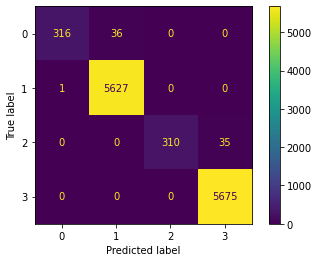

In [46]:
disp.plot()
plt.show()

In [47]:
from sklearn.metrics import classification_report
print("Classification Report of Logistic Regression:")
print(classification_report(y_test, y_preds))

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.90      0.94       352
           1       0.99      1.00      1.00      5628
           2       1.00      0.90      0.95       345
           3       0.99      1.00      1.00      5675

    accuracy                           0.99     12000
   macro avg       1.00      0.95      0.97     12000
weighted avg       0.99      0.99      0.99     12000



### Adaboost classifier

In [48]:
from sklearn.ensemble import AdaBoostClassifier

clf_ab = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ab.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [49]:
ab_pred = clf_ab.predict(X_test)

In [50]:
acc_ab = clf_ab.score(X_test,y_test)
print("Accuracy of Adaboost classifier is:", acc_ab)

Accuracy of Adaboost classifier is: 0.9419166666666666


In [51]:
print("Classification Report of Adaboost:\n",classification_report(y_test,ab_pred))

Classification Report of Adaboost:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       352
           1       0.94      1.00      0.97      5628
           2       0.00      0.00      0.00       345
           3       0.94      1.00      0.97      5675

    accuracy                           0.94     12000
   macro avg       0.47      0.50      0.49     12000
weighted avg       0.89      0.94      0.91     12000



D:\Kunal\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Kunal\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Kunal\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
cm_ab = confusion_matrix(y_test, ab_pred, labels=clf_ab.classes_)
print(cm_ab)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ab,display_labels=clf_ab.classes_)

[[   0  352    0    0]
 [   0 5628    0    0]
 [   0    0    0  345]
 [   0    0    0 5675]]


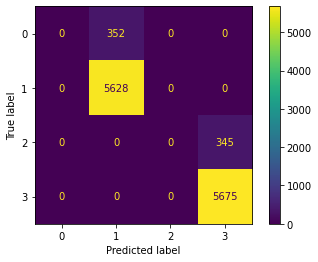

In [53]:
disp.plot()
plt.show()

### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)

In [55]:
print(clf_rf.fit(X_train, y_train))

RandomForestClassifier(max_depth=2, random_state=0)


In [56]:
rf_pred = clf_rf.predict(X_test)
print(rf_pred)

[1 1 1 ... 3 1 3]


In [57]:
acc_rf = clf_rf.score(X_test,y_test)
print("Accuracy of Random Forest is:", acc_rf)

Accuracy of Random Forest is: 0.8386666666666667


In [58]:
print("Classification Report of Random Forest:\n",classification_report(y_test,rf_pred))

Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       352
           1       0.77      1.00      0.87      5628
           2       0.00      0.00      0.00       345
           3       0.94      0.78      0.85      5675

    accuracy                           0.84     12000
   macro avg       0.43      0.45      0.43     12000
weighted avg       0.81      0.84      0.81     12000



D:\Kunal\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Kunal\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Kunal\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
cm_rf = confusion_matrix(y_test, rf_pred, labels=clf_rf.classes_)
print(cm_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=clf_rf.classes_)

[[   0  352    0    0]
 [   0 5628    0    0]
 [   0   78    0  267]
 [   0 1239    0 4436]]


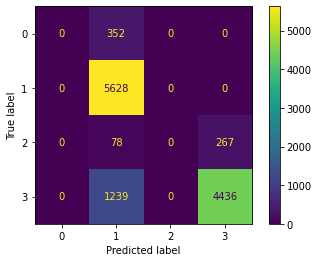

In [60]:
disp.plot()
plt.show()

import seaborn as sns
sns.heatmap(cm_rf, annot=True, fmt='d')#,xticklabels=class_labels, yticklabels=class_labels)

### Xgboost Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
clf_xgb = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
acc_xgb = clf_xgb.score(X_test, y_test)

In [63]:
print("Accuracy of XGBoost is:",acc_xgb)

Accuracy of XGBoost is: 0.9479166666666666


In [64]:
xgb_pred = clf_xgb.predict(X_test)
print(xgb_pred)

[3 1 0 ... 3 1 3]


In [65]:
print("Classification Report of XGBoost:\n",classification_report(y_test,xgb_pred))

Classification Report of XGBoost:
               precision    recall  f1-score   support

           0       0.46      0.26      0.34       352
           1       0.96      1.00      0.98      5628
           2       0.81      0.14      0.23       345
           3       0.95      0.99      0.97      5675

    accuracy                           0.95     12000
   macro avg       0.80      0.60      0.63     12000
weighted avg       0.94      0.95      0.94     12000



[[  93  238   11   10]
 [   1 5627    0    0]
 [  40    0   47  258]
 [  67    0    0 5608]]


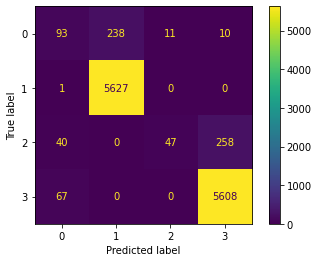

In [66]:
cm_xgb = confusion_matrix(y_test, xgb_pred, labels=clf_xgb.classes_)
print(cm_xgb)


disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=clf_xgb.classes_)
disp.plot()
plt.show()

### KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [68]:
scaler = preprocessing.StandardScaler().fit(X_train)
Xtrain = scaler.transform(X_train)
Xtest = scaler.transform(X_test)

clf_knn = neighbors.KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(Xtrain, y_train)
knn_pred = clf_knn.predict(Xtest)

acc_knn = accuracy_score(y_test, knn_pred)
print("Accuracy of KNN is:",acc_knn)
print("Classification Report of KNN is:\n",classification_report(y_test, knn_pred))
print("Confusion matrix KNN:\n",confusion_matrix(y_test, knn_pred))

Accuracy of KNN is: 0.9408333333333333
Classification Report of KNN is:
               precision    recall  f1-score   support

           0       0.29      0.02      0.03       352
           1       0.94      1.00      0.97      5628
           2       0.36      0.01      0.03       345
           3       0.94      1.00      0.97      5675

    accuracy                           0.94     12000
   macro avg       0.63      0.51      0.50     12000
weighted avg       0.91      0.94      0.91     12000

Confusion matrix KNN:
 [[   6  346    0    0]
 [  15 5613    0    0]
 [   0    0    5  340]
 [   0    0    9 5666]]


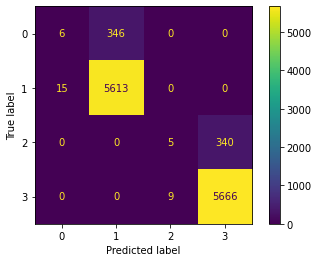

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, knn_pred),display_labels=clf_knn.classes_)
disp.plot()
plt.show()

### Linear SVM

In [70]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [71]:
X_train_ = StandardScaler().fit_transform(X_train)
X_test_ = StandardScaler().fit_transform(X_test)

In [72]:
clf_lsvm = SVC(kernel = 'linear', random_state = 0)
clf_lsvm.fit(X_train_, y_train)


SVC(kernel='linear', random_state=0)

In [73]:
lsvm_pred = clf_lsvm.predict(X_test_)
print(lsvm_pred)

[3 1 0 ... 3 1 3]


In [74]:
from sklearn.metrics import classification_report
print("Classification Report of Linear SVM is:\n",classification_report(y_test,lsvm_pred))

Classification Report of Linear SVM is:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       352
           1       1.00      1.00      1.00      5628
           2       0.99      0.94      0.96       345
           3       1.00      1.00      1.00      5675

    accuracy                           1.00     12000
   macro avg       0.99      0.97      0.98     12000
weighted avg       1.00      1.00      1.00     12000



[[ 333   19    0    0]
 [   8 5620    0    0]
 [   0    0  324   21]
 [   0    0    4 5671]]


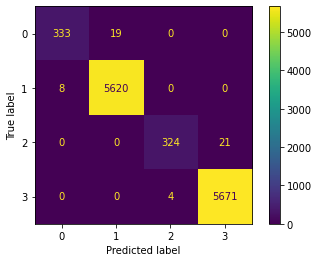

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lsvm = confusion_matrix(y_test,lsvm_pred, labels=clf_lsvm.classes_)
print(cm_lsvm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm_lsvm,display_labels=clf_lsvm.classes_)
disp.plot()
plt.show()

In [76]:
print("Accuracy of Linear SVM is: ",clf_lsvm.score(X_test_,y_test))

Accuracy of Linear SVM is:  0.9956666666666667
